In [51]:
from numpy import *
import numpy as np
import pandas as pd
import math
df = pd.read_csv('uw_web_cat_usage_v2_withColAnnotations.csv')

In [2]:
# A = df['guid'].value_counts()
A = df['guid']
# type(A)
device = set()
for i in A:
    device.add(i)
device
len(device)

100

In [13]:
device

{'011465d5a77a4d9cacb63d0d1703f26b',
 '012be325d30b40d1b5d4e1f28cbd6cf2',
 '0146bd782c6f430b8952880a1f72c520',
 '0153afd93cd74690b0963225ae3274f8',
 '015c0292c9c84ef1aa5501212b3090bc',
 '017e1f88e8ab4b039d571131ef9f4715',
 '01993ee6d2034f039f5e13466f5f18a8',
 '01a456dae74c40d68d40fe8514a4a498',
 '0209ab6bb47b4101acae13a6dc80fcec',
 '021242909b85403a830db78780c4df9d',
 '0220b87327fb4ef6aa0c31dbd50eb178',
 '026146f9d720405ebf2a5c305384ebae',
 '0268cd5ff3d54b3e89137bcce769a5f7',
 '0278452a47fc4829ac9a705809b921cc',
 '028ee5717d154984a5b7c3f322283395',
 '029e37c4a7034dc78eaf03a7eeb47c14',
 '02a090838caa4dc291a1013cbdfd66d4',
 '02c73a7c7b7a42f4bb13868e1719f59e',
 '02e510c9b18d4b7d8c542b8f2bf4a0ff',
 '02e7e10ba6d6426d83ac8aeb0cb736fc',
 '02efe25c2e5e459188c353e61254c9d1',
 '030c6c89589341f6b079a5ed637aee41',
 '031610f627a34852af7f09daa4c86646',
 '03203889fd074f73b636206dbdfcd424',
 '034ac12bd1504b3facccf63aab5c30c5',
 '035049eede28460b84779440c549ab21',
 '0383ffe24f7043e6bf7fbea52d6ae145',
 

In [15]:
device = list(device)
device

['a4c8e602d0f24ad384264506b791f2fd',
 '72f10bd6142f4f59ba7c66ed89faf62a',
 'a40bee9fcc9642d3b87a6667df1795a3',
 '8fe3c1d270a9486ab877a5f70c254afb',
 '44990649747449a3a1d76c1d92ed4502',
 '910a004bf4084af89c8de3e77bb8c09a',
 '5607ed1ccdc74d1db6bdc668f20b5142',
 '6525f0baa6f34507a561e88ad6d60d8b',
 '02e7e10ba6d6426d83ac8aeb0cb736fc',
 '710a5c2903bc4da6851de5a7ef0b5116',
 '31946341758e4c38aaa476a23361f6cc',
 '61c7d7c61b8e45c6be582f81410841a5',
 '24c5654f9421477f89f6ea4e2ee75501',
 '6f32f06cf5f24a939e9bd6d1ed25df1f',
 '7cb7b1c2c06a4ce28c29532cf32a774a',
 '9085d0496ca04d15a7bf3b24a33b830d',
 '99d49da5649a43f684942e06f9170beb',
 '026146f9d720405ebf2a5c305384ebae',
 '73d83bd86576438ea3c7e99244eca9fa',
 '93ab63ceb5be4395ae8c3101bdbce1b5',
 '0383ffe24f7043e6bf7fbea52d6ae145',
 '3b58fe422d2047b2bfd3ef8cb7a71e6c',
 '0146bd782c6f430b8952880a1f72c520',
 '01993ee6d2034f039f5e13466f5f18a8',
 '74e0958641754c83a8a5518be9cb62a6',
 '6725121d415d4703a48d7730cccad184',
 'ac85346bbe7d4a88b2321f28295eca05',
 

In [3]:
df_guid = df[df['guid'] == '0efd28b5b9a248be8c75161f4cff49a6']  
df_guid


,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,dt,browser,parent_category,sub_category,duration_ms,page_load_count,site_count,domain_count,page_visit_count
7110,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,education,education,889,1,1,1,1
7111,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,entertainment,other,1648,1,1,1,1
7112,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,entertainment,video streaming,7836517,25,13,1,106
7113,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,mail,mail,10816777,55,24,2,385
7114,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,news,news,7679571,80,49,3,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,productivity,other,81957,10,14,1,22
7451,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,productivity,programming,19992,1,1,1,10
7452,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,search,search,56132,4,2,1,24
7453,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,education,education,8369,1,1,1,2


In [4]:
df_guid['browser'].value_counts()

chrome     321
edge        23
firefox      1
Name: browser, dtype: int64

In [5]:
df_guid_Chrome = df_guid[df_guid['browser'] == 'chrome']
df_guid_Chrome

,load_ts,batch_id,audit_zip,audit_internal_path,guid,interval_start_utc,interval_end_utc,interval_local_start,interval_local_end,dt,browser,parent_category,sub_category,duration_ms,page_load_count,site_count,domain_count,page_visit_count
7110,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,education,education,889,1,1,1,1
7111,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,entertainment,other,1648,1,1,1,1
7112,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,entertainment,video streaming,7836517,25,13,1,106
7113,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,mail,mail,10816777,55,24,2,385
7114,34:38.0,20201216-201728,2020121611-i-04a9a906e1cd5620c-DvGMorfPZd469qF...,V8_2_WEB_CAT_USAGE_20201216065859.V8,0efd28b5b9a248be8c75161f4cff49a6,45:35.0,56:42.0,45:35.0,56:42.0,12/15/2020,chrome,news,news,7679571,80,49,3,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7450,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,productivity,other,81957,10,14,1,22
7451,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,productivity,programming,19992,1,1,1,10
7452,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,search,search,56132,4,2,1,24
7453,14:56.0,20210106-190234,2021010615-i-04a9a906e1cd5620c-kWH1uCWUfqZoI4A...,V8_2_WEB_CAT_USAGE_20210106103901.V8,0efd28b5b9a248be8c75161f4cff49a6,32:48.0,35:31.0,32:48.0,35:31.0,1/6/2021,chrome,education,education,8369,1,1,1,2


In [6]:
Chorme_index = ['entertainment', 'other', 'search', 
                'social', 'mail', 'games', 'productivity', 
                'reference', 'shopping', 'news',  
                'private', 'education', 
                'finance', 'content creation', 'recreation']

In [40]:
res = []
for i in Chorme_index:
    a = df_guid_Chrome[df_guid_Chrome['parent_category']==i]['duration_ms']
    b = df_guid_Chrome[df_guid_Chrome['parent_category']==i]['page_load_count']
    c = df_guid_Chrome[df_guid_Chrome['parent_category']==i]['page_visit_count']
    res.append([b.mean()/a.mean(),c.mean()/a.mean()])
res


[[3.027332455915362e-06, 2.9104354600928876e-05],
 [2.5970058631816393e-05, 0.00010761494335847219],
 [5.0967589052656365e-05, 0.00014402417942884044],
 [2.93687510269808e-05, 8.721778666331945e-05],
 [6.157373843230411e-06, 4.0211016963347155e-05],
 [nan, nan],
 [2.4567415365254067e-05, 0.00011015712050871983],
 [1.6887153733842736e-05, 0.00014615164958467185],
 [2.1599990075680235e-05, 8.172969217824955e-05],
 [1.081895325170043e-05, 7.341874153582503e-05],
 [nan, nan],
 [7.667773087001208e-06, 3.1162616263838236e-05],
 [5.876143884829746e-05, 0.00016491113483231868],
 [0.0001645548790521639, 0.0004936646371564917],
 [2.7159060432304345e-05, 0.0001316460012621419]]

In [16]:
Chrome = df[df['browser'] == 'chrome'] 

In [68]:
page_load = []
page_visit = []
for dev in device:
    Chrome_dev = Chrome[Chrome['guid'] == dev] 
    r1 = []
    r2 = []
    for i in Chorme_index:
        a = Chrome_dev[Chrome_dev['parent_category']==i]['duration_ms'].fillna(0)
        b = Chrome_dev[Chrome_dev['parent_category']==i]['page_load_count'].fillna(0)
        c = Chrome_dev[Chrome_dev['parent_category']==i]['page_visit_count'].fillna(0)
        page_load_count_avg = b.mean()/a.mean()*1000
        page_load_count_avg=np.array(page_load_count_avg)
        s=np.isnan(page_load_count_avg)
        page_load_count_avg[s]=0.0
        
        page_visit_count_avg = c.mean()/a.mean()*1000
        page_visit_count_avg=np.array(page_visit_count_avg)
        s=np.isnan(page_visit_count_avg)
        page_visit_count_avg[s]=0.0
#         if page_load_count_avg is None:
#             page_load_count_avg = 0
        r1.append(page_load_count_avg)
        r2.append(page_visit_count_avg)
    page_load.append(r1)
    page_visit.append(r2)
        
page_load

[[array(0.01807083),
  array(0.),
  array(0.30942372),
  array(0.06446726),
  array(0.),
  array(0.07646429),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(4.30634564e-05),
  array(0.),
  array(0.),
  array(0.01440259),
  array(0.)],
 [array(0.0022493),
  array(0.01555446),
  array(0.0085075),
  array(0.11024428),
  array(0.00871259),
  array(0.04287597),
  array(0.03400191),
  array(0.02172452),
  array(0.05011012),
  array(0.11507645),
  array(0.00015015),
  array(0.03968207),
  array(0.0257502),
  array(0.04173187),
  array(0.)],
 [array(0.01140316),
  array(0.01382642),
  array(0.09892295),
  array(0.02229527),
  array(0.05659197),
  array(0.0312275),
  array(0.01418465),
  array(0.00776318),
  array(0.),
  array(0.),
  array(0.0002033),
  array(0.06320141),
  array(0.05286306),
  array(0.10591724),
  array(0.)],
 [array(0.00183906),
  array(0.00267499),
  array(0.05257748),
  array(0.),
  array(0.00546788),
  array(0.),
  array(0.),
  array(0.00299912),
  array(0.002

In [74]:
t = 0
load = []
for i in range(len(Chorme_index)):
    for j in range(100): 
        t += page_load[j][i]
    t = t/100
    load.append(t)
load


[0.01339491785912669,
 0.021892497575689812,
 0.07307424937546918,
 0.03974668269639759,
 0.0907356576104858,
 0.050763267750864385,
 0.05529457182597624,
 0.03716843181395296,
 0.04440036072016941,
 0.0277136165511846,
 0.002770476082441002,
 0.050433047800217734,
 0.08014769465086262,
 0.10491777593823932,
 0.04693240713324273]

In [79]:
M = max(load)
load = load/M
load

array([0.12767062, 0.20866338, 0.69649064, 0.3788365 , 0.86482635,
       0.48383858, 0.52702768, 0.35426248, 0.42319197, 0.26414605,
       0.02640616, 0.48069116, 0.76390958, 1.        , 0.4473256 ])

C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


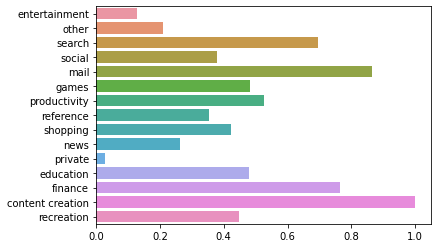

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
X_browser = np.array(Chorme_index)
Y_browser = np.array(load)

ax = sns.barplot(Y_browser,X_browser, order=X_browser)
plt.show()

In [77]:
tt = 0
visit = []
for i in range(len(Chorme_index)):
    for j in range(100): 
        tt += page_visit[j][i]
    tt = tt/100
    visit.append(tt)
visit

[0.047458593629829,
 0.08159053296657333,
 0.1031545693953246,
 0.0898502252513328,
 0.10854094377044685,
 0.12504816536707314,
 0.12893762083486782,
 0.10706344743969312,
 0.09510809447209036,
 0.04873190239279715,
 0.002980658940857127,
 0.08918962294846676,
 0.10175277083589901,
 0.16831089390778392,
 0.07686061221774584]

In [81]:
M2 = max(visit)
visit = visit/M2
visit

array([0.28196983, 0.48476086, 0.61288112, 0.53383488, 0.64488365,
       0.74295943, 0.76606818, 0.63610527, 0.56507391, 0.28953505,
       0.01770925, 0.52990998, 0.60455249, 1.        , 0.45665857])

C:\Users\hooga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


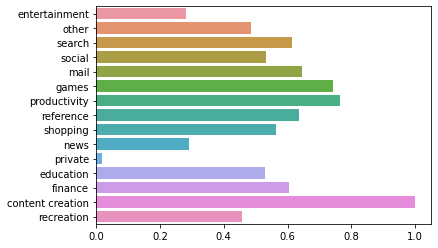

In [84]:
X_browser = np.array(Chorme_index)
Y_browser = np.array(visit)

ax = sns.barplot(Y_browser,X_browser, order=X_browser)
plt.show()

In [70]:
len(page_visit)

100

In [69]:
page_visit

[[array(0.25665083),
  array(0.),
  array(0.34478643),
  array(0.25786903),
  array(0.),
  array(0.22939287),
  array(0.),
  array(0.),
  array(0.),
  array(0.),
  array(4.30634564e-05),
  array(0.),
  array(0.),
  array(0.16197378),
  array(0.)],
 [array(0.01106797),
  array(0.08159376),
  array(0.01931493),
  array(0.13048403),
  array(0.02605399),
  array(0.10766632),
  array(0.23336879),
  array(0.06269075),
  array(0.09544785),
  array(0.15823012),
  array(0.00015015),
  array(0.18698822),
  array(0.10603024),
  array(0.18779343),
  array(0.)],
 [array(0.03522274),
  array(0.10580217),
  array(0.1268108),
  array(0.17340768),
  array(0.13660131),
  array(0.11938416),
  array(0.29495738),
  array(0.04269747),
  array(0.),
  array(0.),
  array(0.0002033),
  array(0.1416765),
  array(0.26431532),
  array(0.24714023),
  array(0.)],
 [array(0.00860419),
  array(0.00931798),
  array(0.02693531),
  array(0.),
  array(0.00604854),
  array(0.),
  array(0.),
  array(0.02099382),
  array(0.0

In [66]:
page_visit[0][0]

array(3896.34437377)

In [56]:
p = page_load[0]
a=np.array(p)
s=np.isnan(p)
a[s]=0.0
a

array([5.53378006e+04, 0.00000000e+00, 3.23181429e+03, 1.55117500e+04,
       0.00000000e+00, 1.30780000e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.32215452e+07, 0.00000000e+00,
       0.00000000e+00, 6.94319385e+04, 0.00000000e+00])